In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, exposure, color, util
from scipy.signal import lfilter, convolve2d

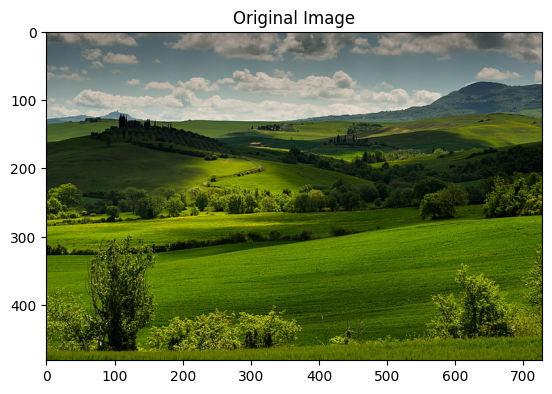

In [2]:
c = io.imread(r'/content/drive/MyDrive/PS_Labs/ps_image.jpg')
plt.figure()
plt.imshow(c)
plt.title('Original Image')
plt.show()

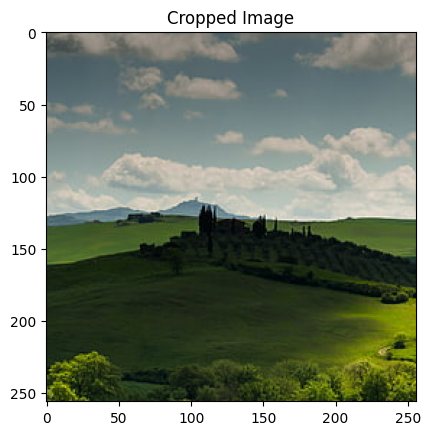

In [3]:
cc = c[1:257, 1:257, :]
plt.imshow(cc)
plt.title('Cropped Image')
plt.show()

## Part 1

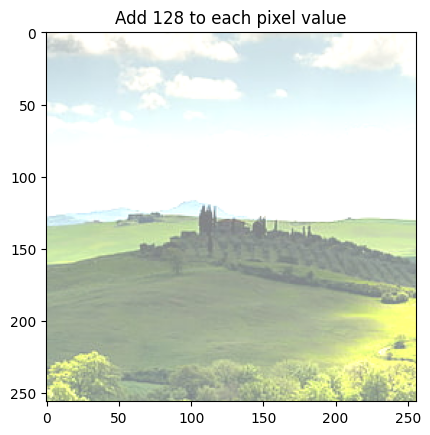

In [4]:
c1 = np.clip(cc.astype(np.float32) + 128, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(c1)
plt.title('Add 128 to each pixel value')
plt.show()

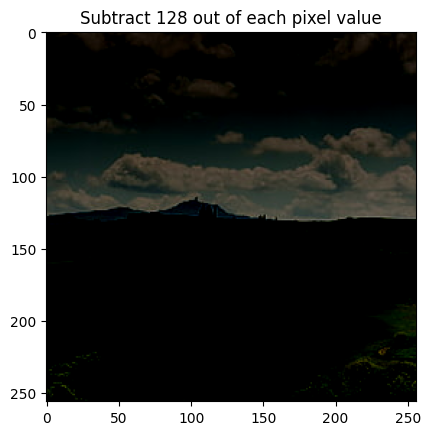

In [5]:
c2 = np.clip(cc.astype(np.float32) - 128, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(c2)
plt.title('Subtract 128 out of each pixel value')
plt.show()

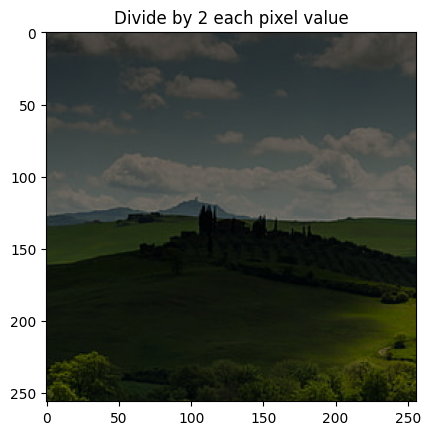

In [6]:
c3 = np.clip(cc.astype(np.float32) / 2, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(c3)
plt.title('Divide by 2 each pixel value')
plt.show()

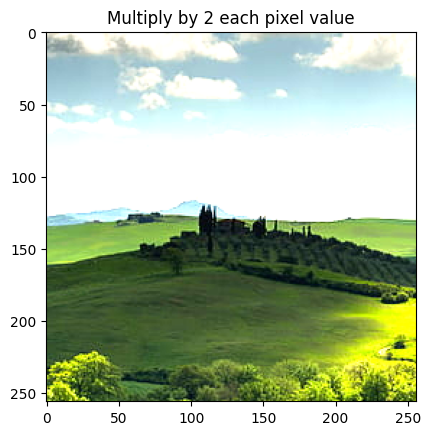

In [7]:
c4 = np.clip(cc.astype(np.float32) * 2, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(c4)
plt.title('Multiply by 2 each pixel value')
plt.show()

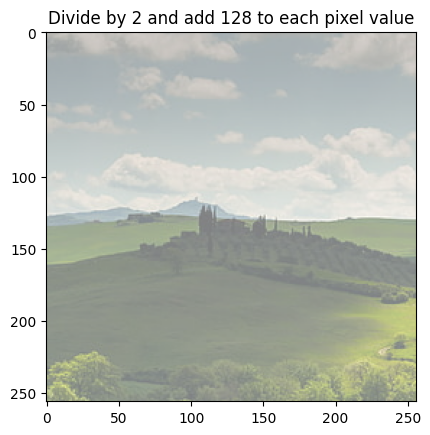

In [8]:
c5 = np.clip(cc.astype(np.float32) * 0.5 + 128, 0, 255).astype(np.uint8)
plt.figure()
plt.imshow(c5)
plt.title('Divide by 2 and add 128 to each pixel value')
plt.show()

## Part 2

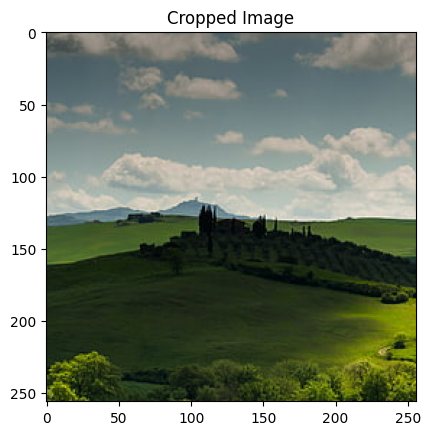

In [9]:
plt.figure()
plt.imshow(cc)
plt.title('Cropped Image')
plt.show()

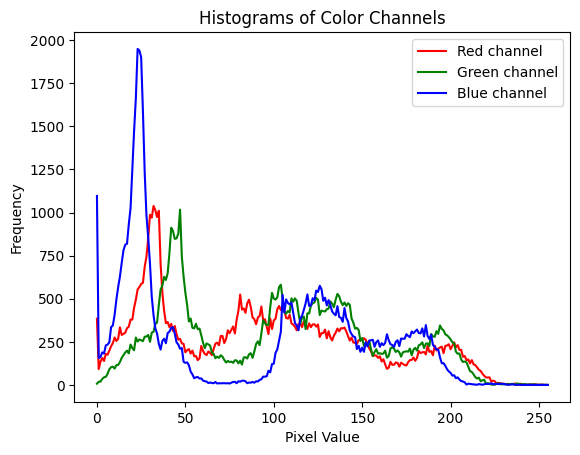

In [10]:
R = np.histogram(cc[:,:,0].ravel(), bins=256, range=(0, 255))[0]
G = np.histogram(cc[:,:,1].ravel(), bins=256, range=(0, 255))[0]
B = np.histogram(cc[:,:,2].ravel(), bins=256, range=(0, 255))[0]

plt.figure()
plt.plot(R, 'r')
plt.plot(G, 'g')
plt.plot(B, 'b')
plt.legend(['Red channel', 'Green channel', 'Blue channel'])
plt.title('Histograms of Color Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

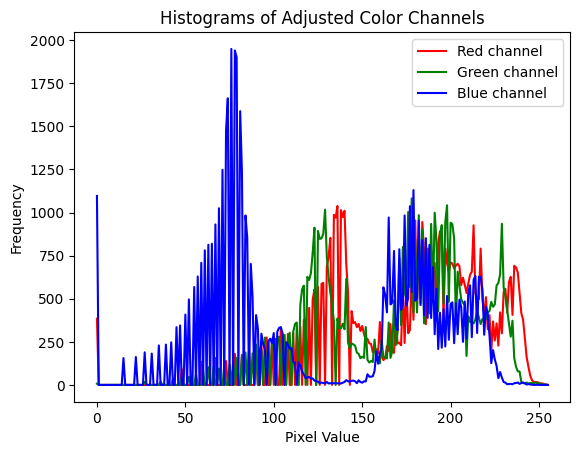

In [11]:
gamma_values = [0.3, 0.4, 0.5]
I2 = np.zeros_like(cc)
for channel in range(3):
    I2[:,:,channel] = exposure.adjust_gamma(cc[:,:,channel], gamma=gamma_values[channel], gain=1)

# Calculate histograms for the adjusted image
R = np.histogram(I2[:,:,0].ravel(), bins=256, range=(0, 255))[0]
G = np.histogram(I2[:,:,1].ravel(), bins=256, range=(0, 255))[0]
B = np.histogram(I2[:,:,2].ravel(), bins=256, range=(0, 255))[0]

plt.figure()
plt.plot(R, 'r')
plt.plot(G, 'g')
plt.plot(B, 'b')
plt.legend(['Red channel', 'Green channel', 'Blue channel'])
plt.title('Histograms of Adjusted Color Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

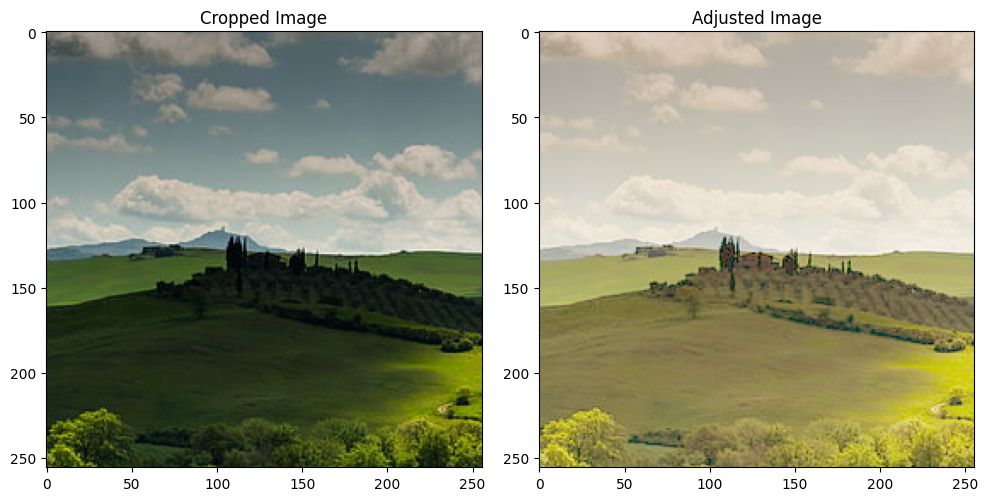

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cc)
axs[0].set_title('Cropped Image')
axs[1].imshow(I2)
axs[1].set_title('Adjusted Image')

plt.tight_layout()
plt.show()

## Part 3

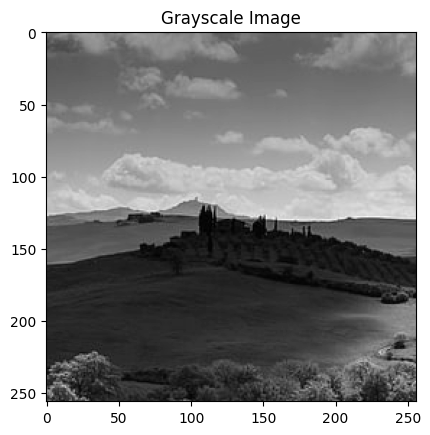

In [13]:
# IG = np.dot(cc[...,:3], [0.2989, 0.5870, 0.1140])
IG = color.rgb2gray(cc)

# Display the grayscale image using Matplotlib
plt.figure()
plt.imshow(IG, cmap='gray')
plt.title('Grayscale Image')
plt.show()

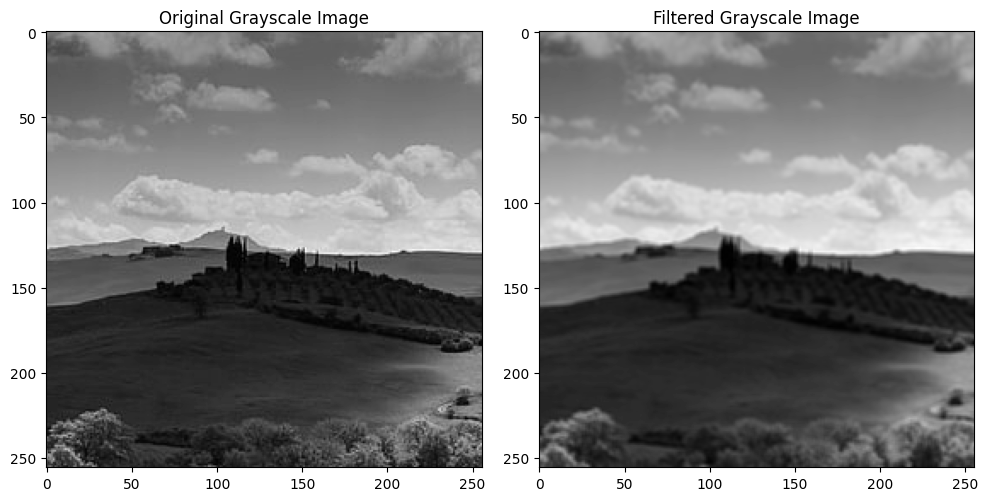

In [14]:
f1 = np.ones((3, 3)) / 9.0  # average filter

cf1 = convolve2d(IG, f1, mode='same', boundary='symm')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(IG, cmap='gray')
plt.title('Original Grayscale Image')
plt.subplot(1, 2, 2)
plt.imshow(cf1/255, cmap='gray')
plt.title('Filtered Grayscale Image')

# Show the plot
plt.tight_layout()
plt.show()

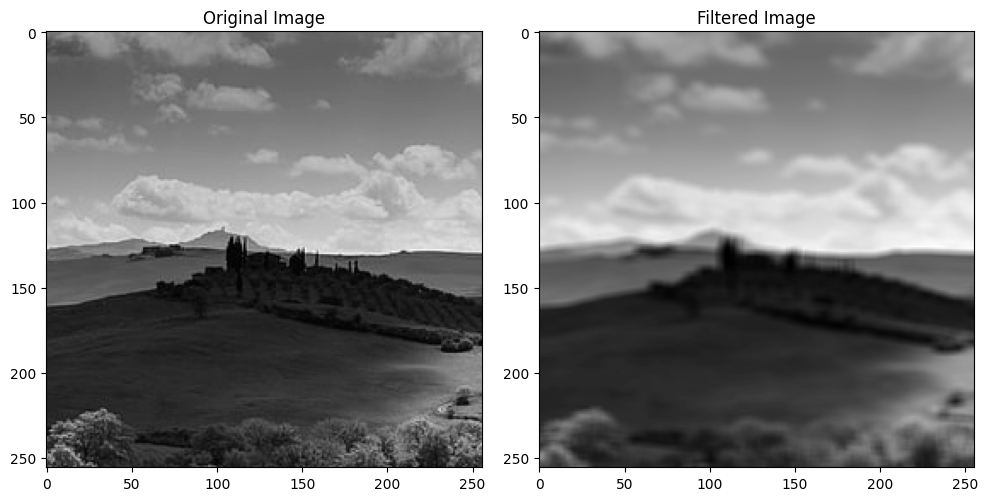

In [15]:
f1 = np.ones((5, 7)) / (5 * 7) # 5 * 7 average filter

cf1 = convolve2d(IG, f1, mode='same', boundary='symm')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(IG, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cf1/255, cmap='gray')
plt.title('Filtered Image')

plt.tight_layout()
plt.show()

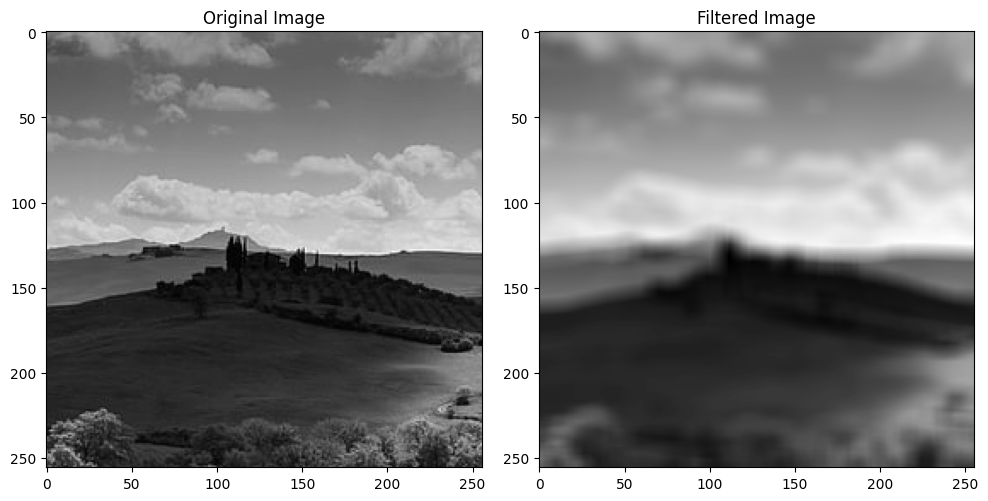

In [16]:
f1 = np.ones((11, 11)) / (11 * 11) # 11 * 11 average filter

cf1 = convolve2d(IG, f1, mode='same', boundary='symm')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(IG, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cf1/255, cmap='gray')
plt.title('Filtered Image')

plt.tight_layout()
plt.show()

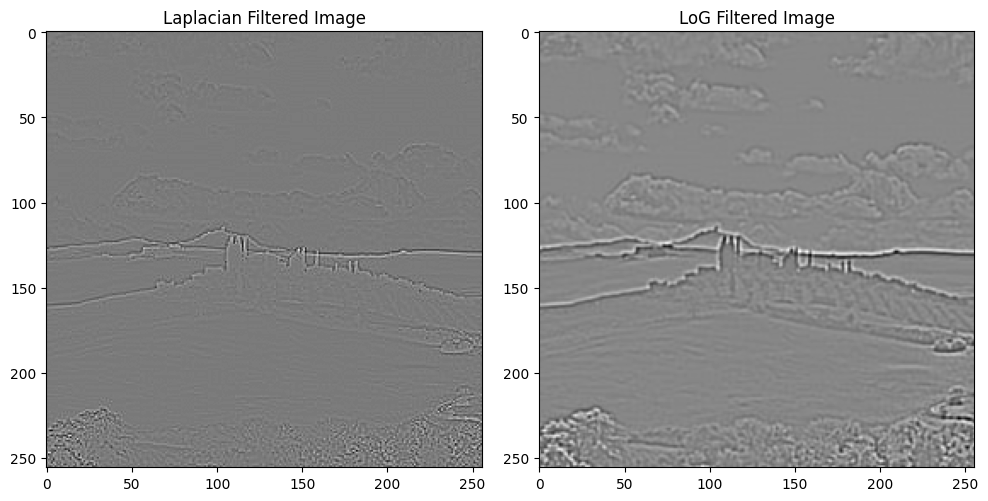

In [17]:
f_laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Create LoG (Laplacian of Gaussian) filter
sigma = 1.0
size = int(6 * sigma + 1) if int(6 * sigma + 1) % 2 == 1 else int(6 * sigma + 2)
x, y = np.meshgrid(np.arange(-(size // 2), size // 2 + 1), np.arange(-(size // 2), size // 2 + 1))
f_log = -(x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (np.pi * sigma**4)

cf2 = convolve2d(IG, f_laplacian, mode='same', boundary='symm')
cf3 = convolve2d(IG, f_log, mode='same', boundary='symm')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cf2/255, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.subplot(1, 2, 2)
plt.imshow(cf3/255, cmap='gray')
plt.title('LoG Filtered Image')

plt.tight_layout()
plt.show()

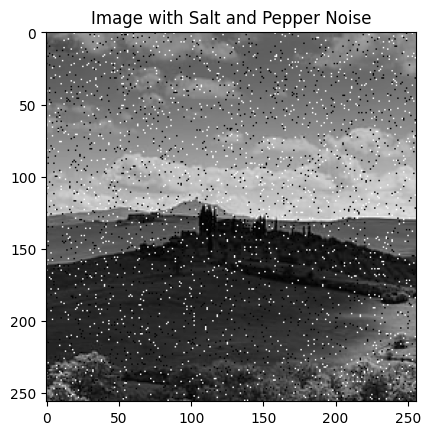

In [18]:
c_sp = util.random_noise(IG, mode='s&p')

plt.imshow(c_sp, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.show()

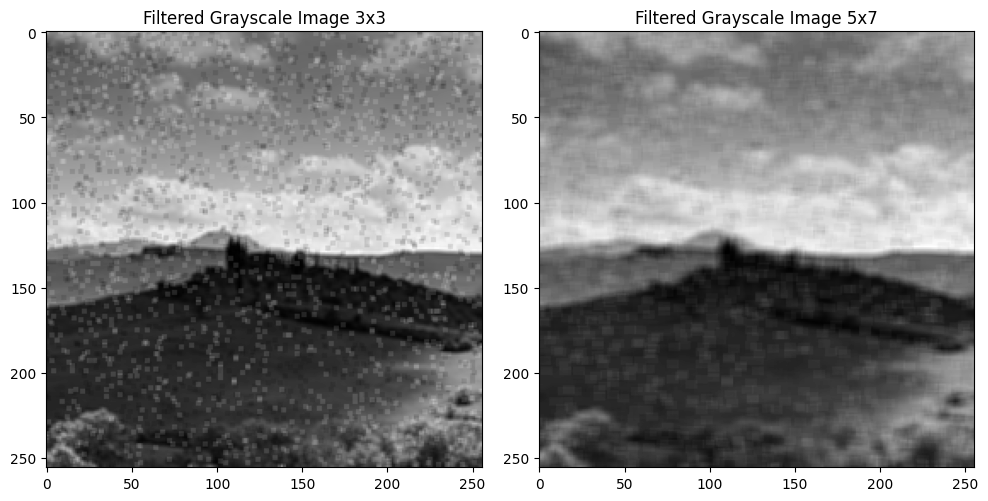

In [19]:
a3 = np.ones((3, 3)) / 9.0
a4 = np.ones((5, 7)) / 5 * 7

c_sp_f3 = convolve2d(c_sp, a3, mode='same', boundary='symm')
c_sp_f4 = convolve2d(c_sp, a4, mode='same', boundary='symm')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(c_sp_f3/255, cmap='gray')
plt.title('Filtered Grayscale Image 3x3')
plt.subplot(1, 2, 2)
plt.imshow(c_sp_f4/255, cmap='gray')
plt.title('Filtered Grayscale Image 5x7')

plt.tight_layout()
plt.show()

## Part 4

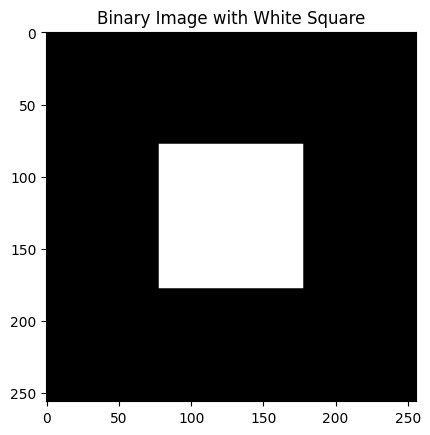

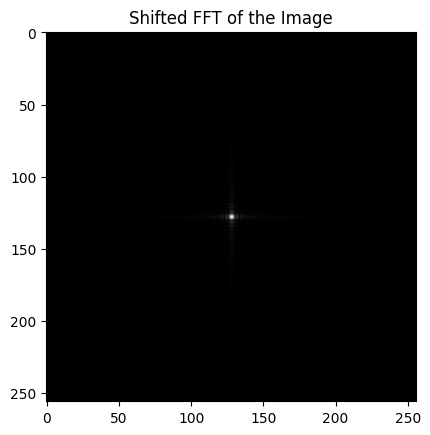

In [20]:
a = np.zeros((256, 256))
a[78:178, 78:178] = 1

plt.imshow(a, cmap='gray')
plt.title('Binary Image with White Square')
plt.show()

af = np.fft.fftshift(np.fft.fft2(a))

plt.imshow(np.abs(af), cmap='gray')
plt.title('Shifted FFT of the Image')
plt.show()

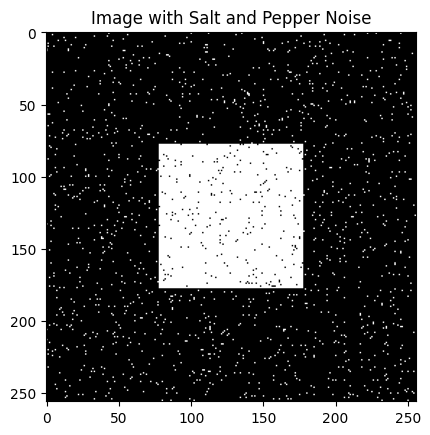

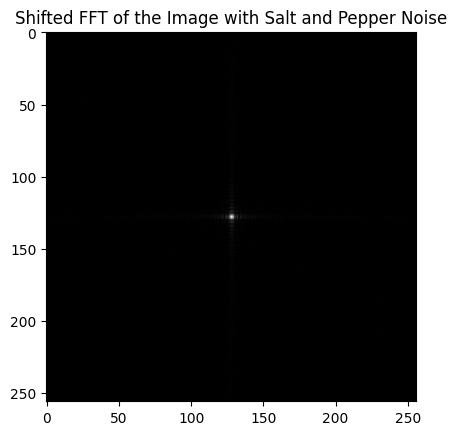

In [21]:
c_sp = util.random_noise(a, mode='s&p')

plt.imshow(c_sp, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.show()

cf = np.fft.fftshift(np.fft.fft2(c_sp))

plt.imshow(np.abs(cf), cmap='gray')
plt.title('Shifted FFT of the Image with Salt and Pepper Noise')
plt.show()

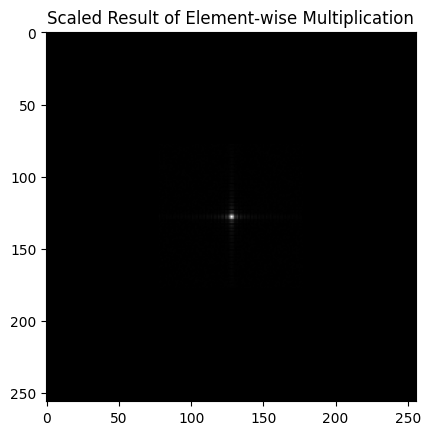

In [22]:
cf1 = cf * a

# Display the scaled result
plt.imshow(np.abs(cf1) / 255, cmap='gray')
plt.title('Scaled Result of Element-wise Multiplication')
plt.show()

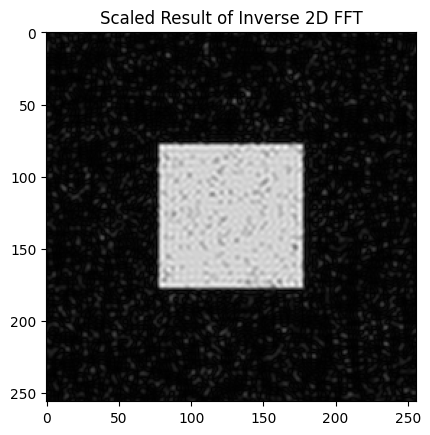

In [23]:
cf2 = np.fft.ifft2(cf1)

# Display the result after scaling
plt.imshow(np.abs(cf2) / 155, cmap='gray')
plt.title('Scaled Result of Inverse 2D FFT')
plt.show()